# Тема: Підготовка та очистка даних у R [033 UA]

---

### Розділ 2. Основи ETL

Курс: "Аналіз даних у R"

---

## Зміст

1. [Поняття та виміри оцінки якості даних](#id1)
2. [Робота з неіменованими та "поганоіменованими" даними](#id2) 
3. [Заміна пропусків у даних (Missing Value Imputation))](#id3)
4. [Обробка аномалій та статистичних викидів у даних](#id4)
5. [Додаткові прийоми очистки даних](#id5)

[Використані джерела](#ids)

---

# 1. Поняття та виміри оцінки якості даних <a class="anchor" id="id1"></a>

Якість даних залежить від очищення та коригування даних, які відсутні, некоректні, недійсні або нечитабельні. Для забезпечення достовірності даних важливо зрозуміти ключові аспекти якості даних, щоб оцінити, наскільки дані погані/хороші.

**Що таке валідація даних?**

Валідація даних відноситься до процесу забезпечення точності та якості даних. Він реалізується шляхом вбудовування кількох перевірок у систему або звітування для забезпечення логічної узгодженості введених і збережених даних.

На перший погляд, очевидно, що перетворення даних до якісних полягає в очищенні поганих даних – даних, які відсутні, неправильні або якимось чином недійсні. Але щоб переконатися, що дані заслуговують довіри, важливо розуміти ключові виміри якості даних, щоб оцінити, наскільки дані є «поганими».

Окремі компанії мають внутрішні документи, що визначають виміри оцінки якості даних та порядок його проведення - `Data Validation Framework` або `Data Quality Framework`.

Коли говорять про якість даних, то мається на увазі їх оцінка у кількох вимірах. Розглянемо коротко ці виміри:

- [x] Правильність / `Accuracy`
- [x] Повнота / `Completeness`
- [x] Узгодженість / `Consistency`
- [x] Відповідність / `Conformity`
- [x] Цілісність / `Integrity`
- [x] Своєчасність / `Timeliness`
- [x] Унікальність / `Uniqueness`


---

### Правильність / (Accuracy)

**Правильність** — це ступінь, до якого дані правильно відображають реальний об’єкт АБО описувану подію. 

Приклади:
- [x] Реальною вартістю є ціна продажу одиниці товару.
- [x] Адреса співробітника в `базі даних співробітників` є справжньою адресою.

Запитання, які ви можете задати собі: 

- [x] Чи об’єкти даних точно представляють значення «реального світу», які вони повинні моделювати? _Наприклад, чи правильно вказувати вік у сотнях тисяч років?_
- [x] Чи присутнє неправильне написання назв товарів чи осіб, адрес і навіть несвоєчасних чи неактуальних даних? 

Ці проблеми можуть вплинути на результатати аналітичних звітів, наприклад, неправильні середні значення певних показників.

---

### Повнота / (Completeness)

Повнота визначається як очікувана всебічність. Дані можуть бути повними, навіть якщо додаткові дані відсутні. Поки дані відповідають очікуванням, вони вважаються повними.

Наприклад, ім’я та прізвище замовника є обов'язковими, але прізвище необов’язково; тому запис можна вважати повним, навіть якщо прізвища не існує.

Питання, які ви можете задати собі: 

- [x] Чи доступна вся необхідна інформація? 
- [x] Чи мають якісь дані відсутні елементи? 
- [x] Або вони перебувають у непридатному для роботи вигляді?


---

### Узгодженість / Consistency

**Узгодженість** означає, що дані в усіх системах/таблицях відображають однакову інформацію та синхронізовані між собою.  

Приклади:
- [x] Статус бізнес-підрозділу "закритий", але є продажі для цього підрозділу.
- [x] Статус працівника "звільнено", але статус випалати заробіної плати містить суму відмінну від 0 за той самий період.
- [x] Зафіксовано, що клієнт має у банку депозити, але у даних про депозити записи по клієнту відсутні.

Запитання, які ви можете поставити собі: 

- [x] Чи однакові значення даних у наборах даних? 
- [x] Чи існують якісь різні випадки, коли однакові екземпляри даних надають суперечливу інформацію?

---

### Відповідність / Conformity

**Відповідність** означає, що дані відповідають набору стандартних визначень даних, як-от тип даних, розмір і формат. Наприклад, дата народження клієнта у форматі `dd/mm/yyyy` або відстань у км числом `100`, а не записом `100км`.

Запитання, які ви можете задати собі: 
- [x] Чи відповідають значення даних зазначеним форматам? 
- [x] Якщо так, то чи всі значення даних відповідають цим форматам?

Важливо підтримувати відповідність конкретним форматам.

---

### Цілісність / Integrity

**Цілісність** означає достовірність даних у взаємозв’язках і гарантує, що всі дані в базі даних можна відстежити та з’єднати з іншими даними.

Наприклад, у базі даних клієнтів має бути дійсний клієнт, адреси та відношення/зв'язки між ними. Якщо є дані про зв’язок адреси без клієнта, то ці дані недійсні й вважаються загубленим записом.

Запитайте себе: 
- [x] Чи є якісь дані без важливих зв’язків?

Неможливість пов’язати записи разом може призвести до дублювання у ваших системах.

---

### Своєчасність / Timeliness

**Своєчасність** показує, чи є інформація доступною, коли вона очікується та потрібна. Своєчасність даних дуже важлива. 

Це відображається в:
- [x] Компанії, які зобов’язані публікувати свої квартальні результати протягом певного періоду часу
- [x] Обслуговування клієнтів надає клієнтам актуальну інформацію
- [x] Кредитна система перевіряє активність рахунку кредитної картки в режимі реального часу

Своєчасність залежить від очікувань користувача. Доступність даних в Інтернеті може знадобитися для системи розподілу номерів у сфері готельного бізнесу.

Як бачите, якість даних є важливим питанням, яке слід враховувати, починаючи від етапу визначення цілей проекту, аж до впровадження, обслуговування та використання готово рішення у виробничі процесі підприємства.

---

# 2. Робота з неіменованими та "поганоіменованими" даними <a class="anchor" id="id2"></a>

## 2.1. Іменування даних <a class="anchor" id="id21"></a>

Першим прикладом проблем у даних можна розгянути читання неіменованих даних, тобто стопці таблиці не мають заголовків у файлі.

Створимо такий файл у блокноті і зчитаємо його:

In [1]:
data <- read.csv("data/untitled.txt")
data

X23,X185,X85.7,Male
<int>,<chr>,<dbl>,<chr>
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Зверніть увагу, що у якості стовпців взято перший рядок даних у додано `X` на початку. Зчитаємо дані із параметром, що вказує на відсутність заголовків:

In [2]:
data <- read.csv("data/untitled.txt", header = FALSE)
data

V1,V2,V3,V4
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Проблема іменування не вирішена, дані ми уже не втратили. Передамо одночасно з читанням інформацію про назви стовпців:

In [3]:
data <- read.csv("data/untitled.txt", 
            header = FALSE,
            col.names = c("Age","Height", "Weight", "Gender"))
data

Age,Height,Weight,Gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Ще одним варіантом задання назв стовпців є використання функції `colnames()` як для усіх різом, так і для окремого:

In [4]:
colnames(data) <- c("age", "height", "width", "gender")
data
colnames(data)[2] <- "HEIGHT"
data

age,height,width,gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


age,HEIGHT,width,gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Також змінювати назви стовпців можна за допомогою функції `rename()` з пакету `dplyr`:

In [5]:
#install.packages("https://cran.r-project.org/src/contrib/Archive/rlang/rlang_1.0.1.tar.gz", repo=NULL, type="source")
library(dplyr)

data <- data |> rename(AGE = age) # %>%
data


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




AGE,HEIGHT,width,gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


---

## 2.2. Заміна назв стовпців data.frame <a class="anchor" id="id22">

Зчитаємо файл, що містить інформацію про осіб, але уже має іменовані стовтці: 

In [6]:
data <- read.csv("data/badtitled.txt")
data

Person.Age,Person__Height,person.Weight,Person.Gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,Male,NA
41,175,68.3,M,NA
11,142*,55.4,Female,NA
12,NA,48.2,Man,NA
54,191,NA,female,NA
32,168,78.0,F,NA
22,NA,54.0,male.,NA
21,165,NA,m,NA
14,NA,90.2,Man,NA


Швидко змінити назви стовпців та привести їх до однакового стилю можна за домогою бібліотеки `janitor`:

In [7]:
#install.packages("janitor")
library(janitor)
clean <- clean_names(data)
colnames(clean)

Warning message:
"package 'janitor' was built under R version 4.1.3"

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




[1] "person_age"    "person_height" "person_weight" "person_gender"
[5] "empty"

---

## 2.3. Підготовка та очистка текстової інформації

Зчитаємо інформацію про стать з попереднього прикладу:

In [8]:
data <- read.csv("data/badtitled.txt")
data <- clean_names(data)
data <- as.data.frame(data$person_gender)
colnames(data) <- c("gender")
data

gender
<chr>
Male
M
Female
Man
female
F
male.
m
Man


Схоже, що ці дані насправді мають всього 2 записи, проте у базу даних їх вносили різні люди або вони були зібрані з різних джерел інформації. Це досить поширена проблема у роботі з даними. Особливо коли відбуваєть заміна людей на рочих місцях або перехід на інше програмне забезпечення.

Якщо це буде розглядатися як факторна змінна без будь-якої попередньої обробки, очевидно, що 8, а не 2 класи будуть збережені. Тому завдання полягає в тому, щоб автоматично розпізнавати наведені вище дані про те, чи відноситься кожен елемент до чоловічої чи жіночої статі. У статистичних контекстах класифікацію таких
"безладні" текстові рядки в ряд фіксованих категорій часто називають кодуванням.

Опишемо два взаємодоповнюючих підходи до кодування рядків: `нормалізація` (`string normalization`) рядків і аналіз схожості тексту (`approximate text matching`).

Розглянемо наступні підходи до очистки текстових даних:

    – [x] Видалення пробілів на початку або в кінці
    – [x] Обрізання/збільшення рядків до певної ширини
    – [x] Перетворення у верхній/нижній регістр.
    – [x] Пошук рядків, що містять прості шаблони (підрядки).
    – [x] Апроксимація рядків на основі "відстаней".

Робота з текстом у `R` здійснюється за допомогою пакету `stringr`.

**Видалення пробілів на початку або в кінці** здійснюється за допомогою функції `str_trim()`.

In [9]:
library(stringr)
str_trim(" ostroh academy  ")
str_trim(" ostroh academy ", side = "left")
str_trim(" ostroh academy ", side = "right")

[1] "ostroh academy"

[1] "ostroh academy "

[1] " ostroh academy"

**Обрізання/збільшення рядків до певної ширини** здійснюється за допомогою функції `str_pad()`.

In [10]:
str_pad(57, width = 6, side = "left", pad = 0)

[1] "000057"

In [11]:
str_pad("ostroh", width = 10, side = "right", pad = "_")

[1] "ostroh____"

**Перетворення у верхній/нижній регістр**

In [12]:
text <- "Ostroh Academy!"
toupper(text)
tolower(text)

[1] "OSTROH ACADEMY!"

[1] "ostroh academy!"

**Пошук рядків, що містять прості шаблони (підрядки)**

Скористаємося функцієя `grep()` та `grepl()` для пошуку підрядків у інформації про стать:

In [13]:
grepl("m", data$gender) # Повертає TRUE/FALSE, якщо знахоить входження рядка
grep("m", data$gender) # Повертає номери рядків, по яких є входження

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[13]  TRUE

[1]  3  5  7  8 10 12 13

In [14]:
grepl("m", data$gender, ignore.case = TRUE) # не враховує регістр букв
grepl("m", tolower(data$gender))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[13]  TRUE

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[13]  TRUE

In [15]:
data$gender
grepl("^m", data$gender, ignore.case = TRUE) # Показує усі збіги, що починаються з вказаної літери

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "Male"   "   M"   "Female" "Man"    "female" "F    "  "male."  "m"     
 [9] "Man"    "female" "F    "  "male."  "m"

[1]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[13]  TRUE

**Пошук "відстані" між ряжками** - це аналіз рядків на схожіть з визначенням рівня співпадінь.

In [16]:
adist("ao", "ao")
adist("ao", "oa")
adist("ao", "45fb")

0


2


4


Давайте проаналізуємо інформацію про стать з точки зору схожості текстів:

In [17]:
m <- c("male", "female")
#adj_m <- adist(data$gender, m)
#adj_m <- adist(tolower(data$gender), m)
#adj_m <- adist(str_trim(tolower(data$gender), side="both"), m)
colnames(adj_m) <- m 
rownames(adj_m) <- data$gender
adj_m

ERROR: Error in colnames(adj_m) <- m: object 'adj_m' not found


In [ ]:
# Видалимо повтори
adj_m |> as.data.frame() |> dplyr::distinct()

Примінимо інформацію про відстані до "нечистих" даних про стать:

In [ ]:
nums <- apply(adj_m, 1, which.min) # Знайдемо найближчі значення
nums

In [ ]:
data.frame(initial = data$gender, coded = m[nums]) # FFFFFFFFFFFFFF - проблема!

Як альтернативу для знаходження відстаней між рядками можна використовувати функції з бібліотеки `stringdist`.

In [ ]:
#install.packages("stringdist")
library(stringdist)
adist("ao", "oa")
stringdist("oa", "ao") # 1, а було 2

Спробуємо "очистити" дані, які ми отримали з допомогою функції `amatch()`:

In [ ]:
nums <- amatch(data$gender,  c("male", "female"), maxDist = 4) # Знайдемо найближчі значення
nums

In [ ]:
data.frame(initial = data$gender, coded = m[nums]) # FFFFFFFFFFFFFF - проблема!

In [ ]:
data <- data |> mutate(gender = ifelse(gender == "F", "female", gender)) # ????? # Space
data
data <- data |> mutate(gender = ifelse(str_trim(gender) == "F", "female", gender))
data
nums <- amatch(data$gender,  c("male", "female"), maxDist = 4)
data.frame(initial = data$gender, coded = m[nums]) 

Місія виконана! Замінимо та збережемо інформацію у файл для майбутніх експериментів по цій темі:

In [ ]:
data <- read.csv("data/badtitled.txt")
data <- clean_names(data)
head(data,2)

In [ ]:
data <- data |> mutate(person_gender = ifelse(str_trim(person_gender) == "F", "female", person_gender))
m <- c("male", "female")
nums <- amatch(data$person_gender, m, maxDist = 4)
data <- data |> mutate(person_gender = m[nums])
data

Замінимо також висоту на числове значення, а не текст:

In [ ]:
data <- data |> mutate(person_height = str_remove(data$person_height, pattern = "[*]"))
data

In [ ]:
data <- data |> mutate(person_height = as.numeric(person_height))
data

In [ ]:
write.csv(data, file = "data/cleaned_titled.csv", row.names = F)

---

# 3. Заміна пропусків у даних (Missing Value Imputation) <a class="anchor" id="id3"></a>

Дані реального світу часто мають відсутні значення. Дані можуть мати відсутні значення з ряду причин, таких як спостереження, які не були записані, пошкодження даних тощо.

**Проблема**
- [x] Обробка відсутніх даних важлива, оскільки багато алгоритмів машинного навчання або програм для візуалізації та аналізу данихне підтримують дані з відсутніми значеннями.

**Рішення**

- [x] Видалити рядки з відсутніми даними з набору даних.
- [x] Замінити відсутні значення середніми/медіанними значеннями.

**Примітка**

- [x] Використовуйте бізнес-логіку/знання для окремого підходу до кожної змінної
- [x] У разі малого розміру вибірки або великої частки спостережень із відсутніми значеннями бажано замінювати, а видаляти

Некоректна інформація в даних може бути записана різними способами, наприклад у датасеті ці дані можуть бутьу визначені як `NA` `<NA>` `NULL` `undefinded` `Undefined`. Перед обробкою таких даних усі невизначені записи варто конвертувати у `NA`.

In [19]:
!!!!!!!!!!!!!!!!!! ---- na. read!

ERROR: Error in parse(text = x, srcfile = src): <text>:1:29: unexpected symbol
1: !!!!!!!!!!!!!!!!!! ---- na. read
                                ^


Щоб переглянути список усіх стовпців, що мають пропуски даних можна скористатися наступним кодом:

In [ ]:
data <- read.csv("data/cleaned_titled.csv")
data

## 3.1. Перевірка наявності пропусків у даних

Пакет **MICE (Multivariate Imputation via Chained Equations)**

In [ ]:
#install.packages("mice")
library(mice)
md.pattern(data)


 Variables sorted by number of missings: 
 Variable Count
   gender     0



 Missings in variables:
[1] Variable Count   
<0 rows> (or 0-length row.names)

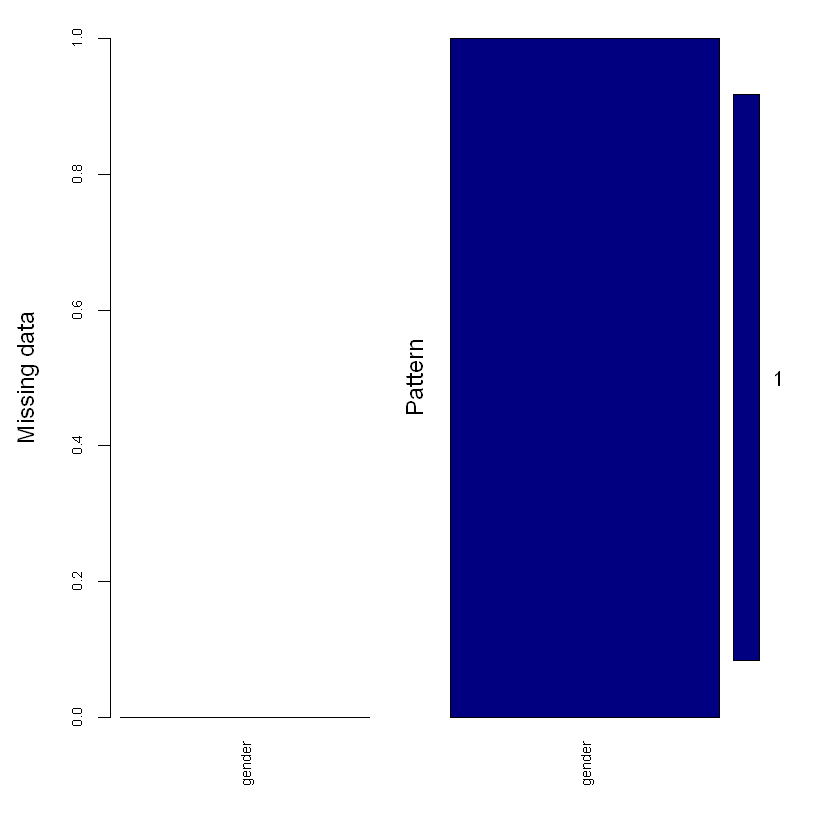

In [20]:
#install.packages("VIM")
library(VIM)
mice_plot <- aggr(data, 
                  col=c('navyblue','yellow'),
                  numbers=TRUE, 
                  sortVars=TRUE,
                  labels=names(data), 
                  cex.axis=.7,
                  gap=3, 
                  ylab=c("Missing data","Pattern"))
mice_plot

In [21]:
ДОдати приклад library(Amelia)
library(Amelia)
Amelia::missmap(data)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '<'
1: <
    ^


Також можна скористатися альтернативними макетами: `Amelia`, `missForest`, `mi`.

---

## 3.2. Видалення пустих рядків та сповпців у data.frame

Переглянемо стовпці, що містять пропуски:

In [ ]:
# Переглянемо список стовпців з пропусками
colnames(data)[apply(data, 2, anyNA)]

Функція `complete.cases` повертає логічні значення

In [ ]:
complete.cases(data) # бо є стовпець Empty

Також видаляти стовпці та рядки з `data.frame` можна за допомогою пакету `janitor`.

In [ ]:
library(janitor)
data_cleaned <- remove_empty(data, which = c("rows","cols"), quiet = FALSE)
data_cleaned

In [ ]:
write.csv(data_cleaned, file = "data/cleaned_titled2.csv", row.names = F)

Як бачимо, колонка `empty` була видалена.

Щоб переглянути усі записи, що не мають пропусків скористаємося функцією `na.omit()`:

In [ ]:
na.omit(data_cleaned)

Таким чином пропущені значення будуть видалені з датасети, якщо інформацію переприсвоїти `data <- na.omit(data)`

---

## 3.3. Заміна пропусків у data.frame

Існує ряд підходів, що використовуються для заміни пропущених значень у датасеті:

**Заміна на 0**
* Вставте пропущені значення нулем

**Заміна на медіану/середнє значення**
* Для числових змінних - середнє або медіана, мінімум, максимум
* Для категоріальних змінних - мода (бувають випадки, коли моду доцільно використовувати і для цислових)

**Сегментна заміна**
* Визначення сегментів
* Обчислення середнього/медіани/моди для сегментів
* Замінити значення по сегментах
* Наприклад, ми можемо сказати, що кількість опадів майже не змінюється для міст у певній області України, у такому випадку ми можемо для усіх міст з пропусками записати значення середнє по регіону.

**Інтелектуальна заміна** (Частковий випадок сегментної заміни)
* Заміна значень з використанням методів машинного навчання

### 3.3.1. Заміна пропусків на нуль (0)

In [ ]:
data <- read.csv("data/cleaned_titled2.csv")
data

In [ ]:
Замінимо інформацію про вагу з пропусками на `0`:

In [ ]:
data_w0 <- data |> mutate(person_weight = ifelse(is.na(person_weight), 0, person_weight))
data_w0

In [ ]:
# Без dplyr
data_w0 <- data
data_w0[is.na(data_w0$person_weight), "person_weight"] <- 0
data_w0

Зробити заміну для усіх числових стовпців:

In [ ]:
library(tidyr) # for replace_na()
data_all <- data |> mutate_if(is.numeric , replace_na, replace = 0)
data_all

---

### 3.3.2. Базова числова заміна пропусків

Заміна на константи або обчислені значення є стандарним підходом. Так, наприклад, заміна певного значення на середнє матиме вигляд:

In [ ]:
data_m <- data |> mutate(person_weight = ifelse(is.na(person_weight), mean(data$person_weight, na.rm = T), person_weight))
data_m

Заміна на min, max, median не відрізняється.

Якщо виникає потреба замінити, наприклад, усі значення на медіану у всіх стовпцях за один прохід можна скористатися функцією `mutate_if()`:

In [ ]:
data_all <- data |> mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm = T), x))
data_all

Розгялнемо кілька бібліотек для перевірки даних на наявність про

Ще одним із варіантів заміни значень може бути використання бібліотеки `Hmisc`:

In [ ]:
#install.packages("Hmisc")
library(Hmisc)
data_wm <- data |> mutate(person_weight = impute(data$person_weight, fun = mean)) # mean imputation
# Аналогічно можна замінити на min,max, median чи інші функції
data_wm 
# * Значення із * - замінені

---

### 3.3.3. Hot deck imputation (як перекласти???)

Метод `Hot deck imputation` передбачає, що пропущені значення обчислюються шляхом копіювання значень із подібних записів у тому ж наборі даних.

Основне питання при `Hot deck imputation` полягає в тому, як вибрати значення заміни. Одним із поширених підходів є випадковий відбір:

In [ ]:
# set.seed(1)
data_hot <- data |> mutate(person_weight = impute(data$person_weight, "random")) 
data_hot 

Вихідне значення залежить від значення `seed`.

### 3.3.4. Сегментна заміна пропусків

Заміна по сегментах часто дозволяє будувати точніші математичні моделі, адже групові середні краще описують явища і процеси, ніж загальні для всієї вибірки.

Знайдемо середні значення ваги за статтю та використаємо ці значення для заміни пропусків у даних.

In [ ]:
data_sgm <- data |> 
                group_by(person_gender) |>
                mutate(person_weight = replace_na(person_weight, mean(person_weight, na.rm = TRUE)))
data_sgm

Також можна здійснити заміну значень по усіх стовпцях датасету за один раз. Проте не варто такий підхід використовувати постійно, а враховувати бізнес-логіку процесів, що вивчаються.

In [ ]:
data_sgm2 <- data %>% 
  group_by(person_gender) %>% 
    mutate(
      across(everything(), ~replace_na(.x, min(.x, na.rm = TRUE)))
    )
data_sgm2

Якщо ж є потреба замінювати по окремих стовпцях, то їх можна вказати замість `everything()`: `across(c("person_height", "person_weight"), ~replace_na(.x, min(.x, na.rm = TRUE)))`.

Іншим варіантом може бути вказання номерів колонок: `across(c(1,3), ~replace_na(.x, min(.x, na.rm = TRUE)))`

### 3.3.5. Інтелектуальні методи заміни

Теоретично інтелектуальні методи заміни пропусків є найкращими, адже враховують математичні залежності у даних.

https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c

In [18]:
library(VIM)
data_knn <- kNN(data)
data_knn
data

Warning message:
"package 'VIM' was built under R version 4.1.3"
Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep


Warning message in kNN(data):
"Nothing to impute, because no NA are present (also after using makeNA)"


gender,gender_imp
<chr>,<lgl>
Male,FALSE
M,FALSE
Female,FALSE
Man,FALSE
female,FALSE
F,FALSE
male.,FALSE
m,FALSE
Man,FALSE


gender
<chr>
Male
M
Female
Man
female
F
male.
m
Man


Ще одним схожим методом заміни пропусків може бути здійснення прогнозів на основі регресії чи складніших математичних методів пропусків.

---

# 4. Обробка аномалій та статистичних викидів у даних <a class="anchor" id="id4"></a>

## 4.1. Аналіз та обробка статистичних викидів

**Виявлення аномалій** — це сукупність методів, призначених для виявлення незвичайних точок даних, які мають вирішальне значення для виявлення шахрайства та захисту комп’ютерних мереж від зловмисної діяльності.

**Аномалія** - точка даних або набір точок даних, які не мають таку саму структуру та поведінку, що й інші дані.

Аномалії у даних можуть мати різну природу та по різному себе проявляти:

- [x] Точкова аномалія
    * Єдина точка даних
    * Незвично в порівнянні з іншими даними
    
Приклад: одна добова висока температура 41°С серед ряду звичайних весняних днів

In [ ]:
temp <- c(15, 17, 19, 12, 30, 41, 17, 20)
boxplot(temp, ylab = "Celcium")

- [x] Колективна аномалія
    * Аномальна колекція екземплярів даних
    * Незвично, якщо розглядати разом

Опишемо набір даних, до використовуватиметься надалі для прикладів.

`river_eco` - це data.frame, що містить такі три стовпці:
- [x] `index` - цілі числа, що описують порядок спостережень нітратів;
- [x] `nitrate` - місячні концентрації розчинених нітратів у річці;
- [x] `month` - змінна, що містить місяць для кожного спостереження нітратів

Нам потрібно дослідити стовпець `nitrate`, щоб оцінити наявність точкових аномалій у даних.

In [ ]:
river_data <- read.csv("data/river_eco.csv")
head(river_data)

Переглянемо описову статистику показника нітрати:

In [ ]:
summary(river_data$nitrate)

Як видно, медіана та середнє відрізняються не дуже.

Далі перевіримо наявність викидів у даних за допомогою `boxplot`:

In [ ]:
boxplot(river_data$nitrate)
# Додамо лінії 1 та 3 квантилів
abline(h=quantile(river_data$nitrate,0.25),col="red",lty=2)
abline(h=quantile(river_data$nitrate,0.75),col="red",lty=2)

Також виведемо номери рядків спостереженнь, що є викидами:

In [ ]:
boxplot.stats(river_data$nitrate)$out

In [ ]:
hist(river_data$nitrate, xlab = "Nitrate concentration", breaks = 40)

In [ ]:
plot(nitrate ~ index, data = river_data, type = "o")

In [ ]:
# Середньомісячний вміст нітратів у річці
river_grouped <- river_data |> group_by(months) |> summarise(mean = mean(nitrate))
river_grouped 

In [ ]:
plot(river_grouped$mean, type = "o", xlab = "Month", ylab = "Monthly mean")

In [ ]:
boxplot(nitrate ~ months, data = river_data)

Між Q1 та Q2 зосереджено 50% усіх спостережень. Персентиль відображає кількість спостережень, що зосереджені з ним включно.

![](assets/images/03/quantiles.png)

![](assets/images/03/quantiles2.png)

Визначивши викиди у даних з ними можна здійснити кілька операцій:

1. Заміна на деякі значення (impute)
2. Заміна на границі квантилей

In [ ]:
lower_bound <- quantile(river_data$nitrate, 0.025)
lower_bound

upper_bound <- quantile(river_data$nitrate, 0.975)
upper_bound

In [ ]:
outlier_index <- which(river_data$nitrate < lower_bound | river_data$nitrate > upper_bound)
outlier_index

In [ ]:
river_data[outlier_index, ]

Таким чином, усі значення вище та нище деякого показника можемо замінити на потрібні нам значення, наприклад, середні за поточний місяць.

Здійснимо заміну значень у наборі даних на основі квантилей:

In [ ]:
river_data$nitrate_upd <- river_data$nitrate
qnt <- quantile(river_data$nitrate_upd, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(qnt[1], na.rm = T)
river_data$nitrate_upd[river_data$nitrate_upd < (qnt[1] - H)] <- qnt[1]
river_data$nitrate_upd[river_data$nitrate_upd > (qnt[2] + H)] <- qnt[2]

qnt

In [ ]:
boxplot(river_data$nitrate_upd)

In [ ]:
boxplot(nitrate_upd ~ months, data = river_data)

In [ ]:
plot(nitrate_upd ~ index, data = river_data, type = "o")

---

# 5. Додаткові прийоми очистки даних <a class="anchor" id="id5"></a>

## 5.1. Видалення дублікатів

In [ ]:
df <- data.frame(X = c(1,1,2,1,3,2,1), Y = c("A", "B", "C", "A", "B", "C", "A"))
df

In [ ]:
df |> distinct()

---

# Використані джерела <a class="anchor" id="ids"></a>

1. [KPMG Virtual Internship](https://www.insidesherpa.com/virtual-internships/m7W4GMqeT3bh9Nb2c)
2. [An introduction to data cleaning with R / Edwin de Jonge, Mark van der Loo, 2013](https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf)
3. [Anomaly Detection in RAnomaly Detection in R](datacamp.com/courses/anomaly-detection-in-rdatacamp.com/courses/anomaly-detection-in-r)